In [ ]:

#=
 <title> Plot+assoc+Legendre.jl </title>
=#


#for the plots scroll to the bottom   ( Plot+assoc+Legendre.jl )
#for more info see AssociatedLegendreFunctions.jl



In [ ]:
#A representation of associated Legendre function was derived from 8.6.6,
#    8.6.18,8.2.5,3.1.1 in AS (https://www.math.hkbu.edu.hk
#        /support/aands/frameindex.htm)   or
#    14.7.8,14.7.10,14.7.11,14.7.14.1.2.2 in DLMF(dlmf.nist.gov),
#similar formula for type 2.
#(8.6.18 AS) Rodrigues' formula for integer n
#  P(n,z)=(1/((2^n)n!)) (d/dz)^n (z^2 - 1)^n
#(8.6.6 AS) P(n,m,z)= ((z^2 -1)^(m/2))(d/dz)^m P(n,z) for z > 1
#   P(n,m,x) = ((-)^m)((1-x^2)^(m/2))(d/dz)^m P(n,x)  for |x| <= 1   
# expand using binomial theorem where a=z^2 and b = -1
#(3.1.1 AS) define binomial coefficient = C(n,k) = n!/((n-k)! k!)
# defining  n!=n*(n-1)*(n-2)*...3*2*1 = factorial(n)
# (a + b)^n = a^n  + C(n,1)*(a^(n-1))*b  + C(n,2)*(a^(n-1))*b^2 
#      +C(n,3)*(a^(n-3))*b^3 +.......+b^n  where n is a positive integer
#differentiate to obtain the finite sum expression



\begin{equation*}  (   \quad \quad -1 \le \eta_{i} \le 1 \quad ) \end{equation*}

\begin{equation*} P_{l}^{m} ( \eta) = \frac{ ( - )^{m} ( 1 - \eta^2)^{m/2}} {2^{l} l! } \frac{ d^{ l + m}}{d\eta^{ l+m}} (\eta^2 - 1 )^{l}     \end{equation*}
( A&S, 8.6.6 and 8.6.18 )

\begin{equation*} \frac{d^{ l+m} }{d\eta^{ l+m}} ( \eta^{2} - 1)^{l} = \sum_{s=0}^{ l } \binom{l}{s}  \frac{ ( - )^{s} ( 2 l - 2 s ) !  }{ ( 2 l - 2 s - l - m ) ! } \eta^{ 2 l - 2 s - l - m }      \end{equation*}
  provided   $ l - m \geq   2 s $



 A representation of $P_{\mu}^{|\sigma|} (z) (z^{2} - 1 )^{|\sigma|/2} $   is used by combining 8.6.6,8.6.18,8.2.5 (Abramowitz and Stegun),14.7.8,14.7.10,14.7.11,14.7.14.1.2.2 in DLMF(dlmf.nist.gov) $ P_{\mu}^{|\sigma|} (z)   = \frac{( \mu + |\sigma|)! (z^2 - 1 )^{-|\sigma|/2 } } {2^{\mu } \mu ! ( \mu - |\sigma|) ! } \frac{d ^{\mu - |\sigma|}}{dz^{\mu - |\sigma|} } (z^{2} -1 )^{\mu}  $   using  binomial expansion and differentiating}  ; \\ $ P_{\mu}^{|\sigma|} (z) (z^{2} - 1 )^{|\sigma|/2}  = \frac{( \mu + |\sigma|)!}{2^{\mu } \mu !}  \sum_{p=0}^{[\frac{\mu + |\sigma|}{2}]} ( - )^{p} \binom{2\mu - 2p}{\mu - |\sigma|} \binom{ \mu}{p} z^{\mu + |\sigma| - 2 p } $      
 

1

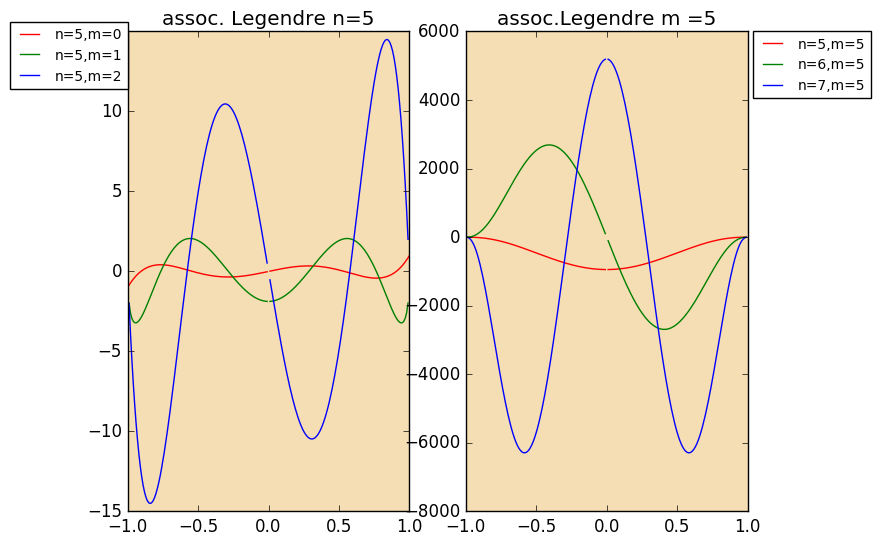

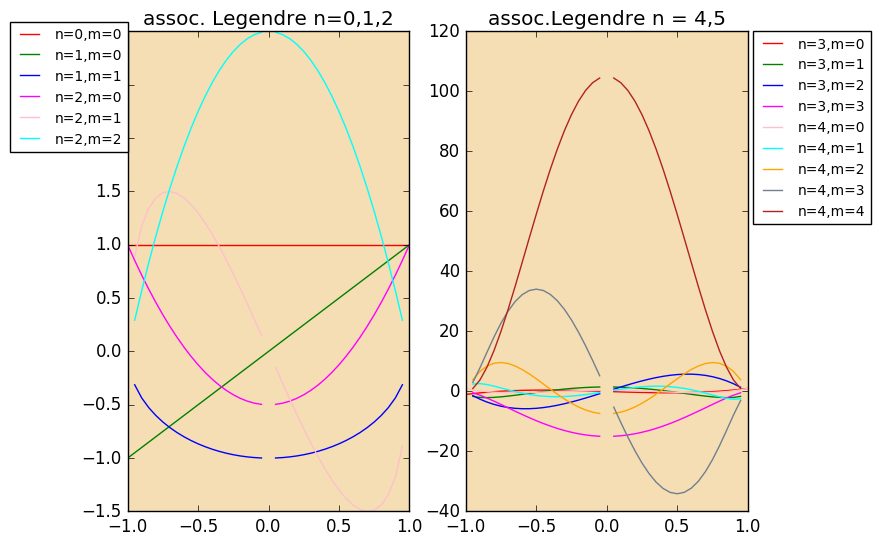

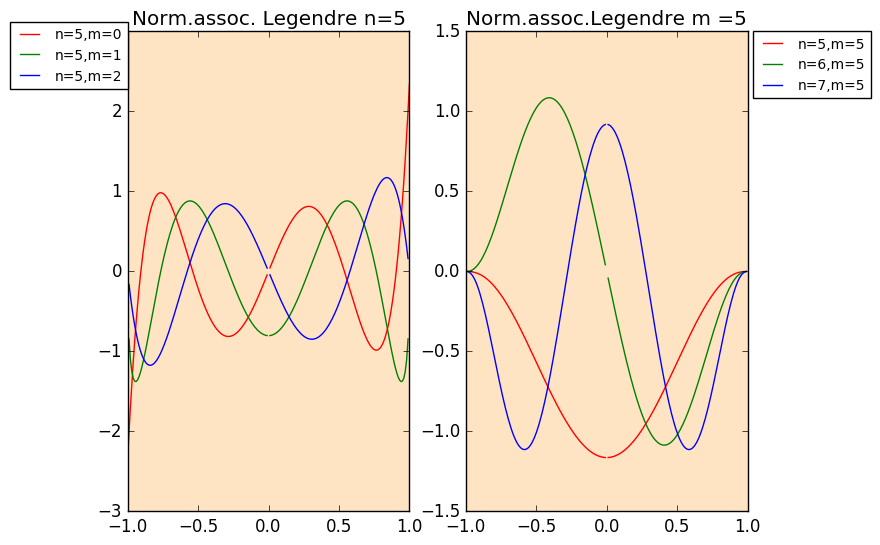

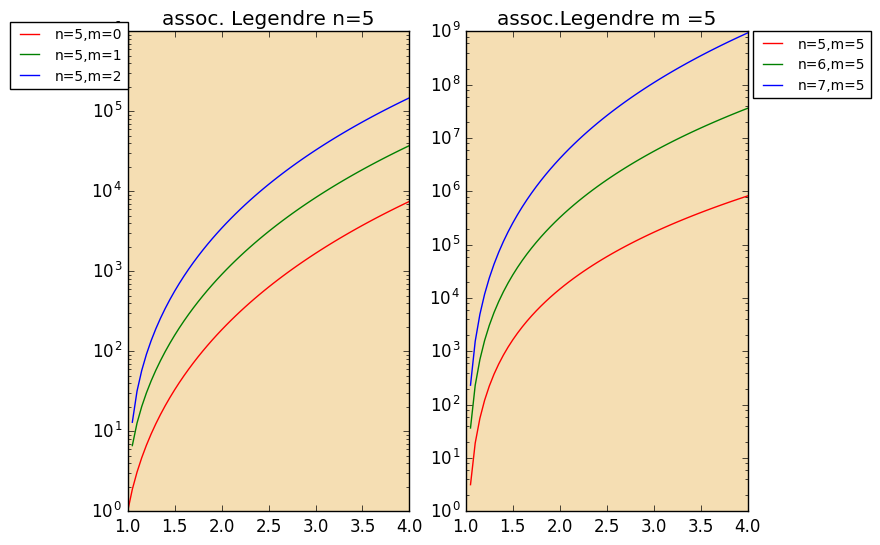

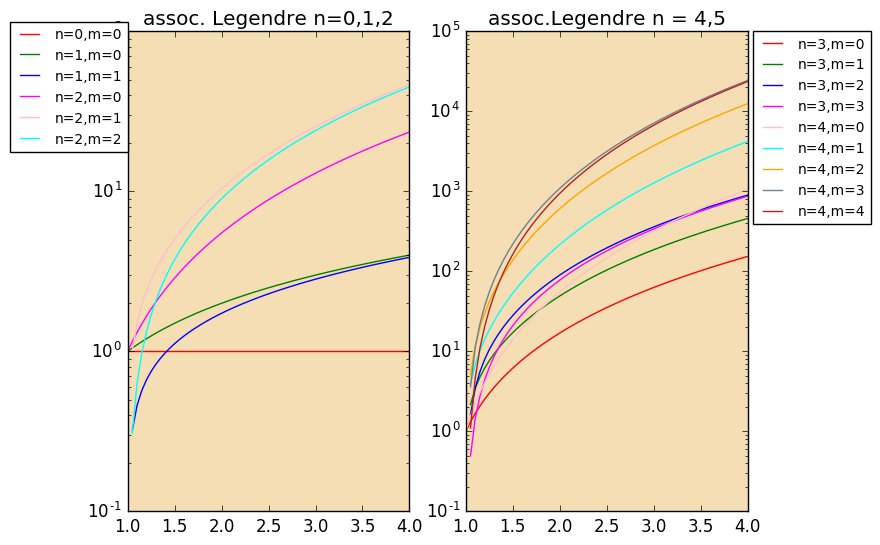

.5511210043330986e25


In [1]:



#for the plots scroll to the bottom   ( Plot+assoc+Legendre.jl )
#for more info see AssociatedLegendreFunctions.jl



"""
    function Nrm(n,m) normalization constant 
    such that when multiplied by associated Legendre function
    and the whole thing squared and integrated over limits = 1
"""


function Nrm(n,m)
    f1=1.
    for k=1:(n+m)
        f1=f1*k
        if k <= (n-m)
            f1=f1/k
        end
    end
    f2 = sqrt(((2*n + 1)/(2*f1)))
    return f2
end

    
"""
    DTLegendreP2(n::Integer,m::Integer,x::Number)
    associated Legendre function 1st kind type 2 , -1.<=x<=1.
    each term in sum is multiple of previous, from SLegendreP2 
    and less overflow,underflow than SS...

"""

function DTLegendreP2(n,m,x)#n,m integers 
    M = (2*n -1) # M must be odd
    # (2m-1)!!= (2m)!/( m! 2^m)   double factorial 
    DT=1.
    if n>0
        for j=1:M
            if  isodd(j)
                DT=DT*j
            end
            if j<=(n-m)
                DT=DT/j
            end
        end    
    end
    MXP=div(m+n,2)
    sum= (x^(n+m))*DT/(((one(x)-x*x)^(m/2)))
    prev=sum
    for p=1:MXP
        term=(-prev)*(n-p+1)*(n+m-2*p+1)*(n+m-2*p+2
        )/(p*(2*n-2*p+1)*(2*n-2*p+2)*x*x)
        sum=sum+term
        prev=term
    end
    return sum
end

"""
    DTLegendreP3(n::Integer,m::Integer,x::Number)
    associated Legendre function 1st kind type 3 , 1.< x
    each term in sum is multiple of previous, from SLegendreP3 
    with less overflow,underflow than SS...

"""

function DTLegendreP3(n::Integer,m::Integer,x::Number)#n,m integers 
    M=2*n -1
    DT=1.
    if n > 0   
        for j=1:M
            if isodd(j)
                DT=DT*j
            end
            if j <= (n-m)
                DT=DT/j
            end
        end
    end
    MXP=div(m+n,2)  
    sum= (x^(n+m))*DT/((x*x - one(x))^(m/2))
    prev=sum
    for p=1:MXP
        term=(-prev)*(n-p+1)*(n+m-2*p+1)*(n+m-2*p+2
        )/(p*(2*n-2*p+1)*(2*n-2*p+2)*x*x)
        sum=sum+term
        prev=term
    end
    return sum
end

#A representation of associated Legendre function was derived from 8.6.6,
#    8.6.18,8.2.5,3.1.1 in Abramowitz and Stegun 
#   (https://www.math.hkbu.edu.hk/support/aands/frameindex.htm) 
#similar formula for type 2.

#plotting n=5 (left) and m=5(right)
using PyPlot
fig,axes=subplots(1,2)
ax=axes[1]
x=-1.:.01:1
y50=[DTLegendreP2(5,0,x) for x=-1:.01:1]
y51=[DTLegendreP2(5,1,x) for x=-1:.01:1]
y52=[DTLegendreP2(5,2,x) for x=-1:.01:1]
ax[:plot](x,y50,color="red",label="n=5,m=0")
ax[:plot](x,y51,color="green",label="n=5,m=1")
ax[:plot](x,y52,color="blue",label="n=5,m=2")
ax[:set_axis_bgcolor]("wheat")
ax[:set_title]("assoc. Legendre n=5")
ax[:legend](bbox_to_anchor=(0,1.02),loc=1,borderaxespad=0,fontsize=10)
ax=axes[2]
y55=[DTLegendreP2(5,5,x) for x=-1:.01:1]
y65=[DTLegendreP2(6,5,x) for x=-1:.01:1]
y75=[DTLegendreP2(7,5,x) for x=-1:.01:1]
ax[:plot](x,y55,color="red",label="n=5,m=5")
ax[:plot](x,y65,color="green",label="n=6,m=5")
ax[:plot](x,y75,color="blue",label="n=7,m=5")
ax[:set_axis_bgcolor]("wheat")
#ax[:set_yscale]("symlog",linthreshy=20) #cannot use neg values in log
ax[:set_title]("assoc.Legendre m =5")
ax[:legend](bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0,fontsize=10)

#title("associated Legendre left n=5      associated Legendre right m=5     
#                    ")
#fig[:canvas][:set_window_title]("associated Legendre n=5 left m=5 right")
fig[:canvas][:draw]()

#plotting n=0,1,2 (left) and n=4,5(right)
using PyPlot
fig,axes=subplots(1,2)
ax=axes[1]
x= -1:.05 : 1
y00=[DTLegendreP2(0,0,x) for x= -1:.05:1]
y10=[DTLegendreP2(1,0,x) for x=-1:.05:1]
y11=[DTLegendreP2(1,1,x) for x= -1:.05:1]
ax[:plot](x,y00,color="red",label="n=0,m=0") 
ax[:plot](x,y10,color="green",label="n=1,m=0")
ax[:plot](x,y11,color="blue",label="n=1,m=1")
y20=[DTLegendreP2(2,0,x) for x=-1:.05:1]
y21=[DTLegendreP2(2,1,x) for x=-1:.05:1]
y22=[DTLegendreP2(2,2,x) for x=-1:.05:1]
ax[:plot](x,y20,color="magenta",label="n=2,m=0") #plot ->semilogy
ax[:plot](x,y21,color="pink",label="n=2,m=1")
ax[:plot](x,y22,color="aqua",label="n=2,m=2")
ax[:set_axis_bgcolor]("wheat")
ax[:set_title]("assoc. Legendre n=0,1,2")
ax[:legend](bbox_to_anchor=(0,1.02),loc=1,borderaxespad=0,fontsize=10)
ax=axes[2]
y30=[DTLegendreP2(3,0,x) for x=-1:.05:1]
y31=[DTLegendreP2(3,1,x) for x=-1:.05:1]
y32=[DTLegendreP2(3,2,x) for x=-1:.05:1]
ax[:plot](x,y30,color="red",label="n=3,m=0")
ax[:plot](x,y31,color="green",label="n=3,m=1")
ax[:plot](x,y32,color="blue",label="n=3,m=2")

y33=[DTLegendreP2(3,3,x) for x=-1:.05:1]
y40=[DTLegendreP2(4,0,x) for x=-1:.05:1]
y41=[DTLegendreP2(4,1,x) for x=-1:.05:1]
ax[:plot](x,y33,color="magenta",label="n=3,m=3")
ax[:plot](x,y40,color="pink",label="n=4,m=0")
ax[:plot](x,y41,color="aqua",label="n=4,m=1")
y42=[DTLegendreP2(4,2,x) for x=-1:.05:1]
y43=[DTLegendreP2(4,3,x) for x=-1:.05:1]
y44=[DTLegendreP2(4,4,x) for x=-1:.05:1]
ax[:plot](x,y42,color="orange",label="n=4,m=2")
ax[:plot](x,y43,color="slategray",label="n=4,m=3")
ax[:plot](x,y44,color="firebrick",label="n=4,m=4")
ax[:set_axis_bgcolor]("wheat")
#ax[:set_yscale]("symlog",linthreshy=20) #cannot use neg values in log
ax[:set_title]("assoc.Legendre n = 4,5")
ax[:legend](bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0,fontsize=10)
#=
ax=axes[3]
x=1:.05:4

z50=[DTLegendreP3(5,0,x) for x=1:.05:4]
z51=[DTLegendreP3(5,1,x) for x=1:.05:4]
z52=[DTLegendreP3(5,2,x) for x=1:.05:4]
ax[:semilogy](x,z50,color="red",label="n=5,m=0") #plot ->semilogy
ax[:semilogy](x,z51,color="green",label="n=5,m=1")
ax[:semilogy](x,z52,color="blue",label="n=5,m=2")
ax[:set_axis_bgcolor]("wheat")
ax[:set_title]("assoc. Legendre n=5")
#ax[:legend](loc="best",fontsize=5)
ax[:legend](bbox_to_anchor=(0,1.02),loc=1,borderaxespad=0,fontsize=10)
ax=axes[4]
z55=[DTLegendreP3(5,5,x) for x=1:.05:4]
z65=[DTLegendreP3(6,5,x) for x=1:.05:4]
z75=[DTLegendreP3(7,5,x) for x=1:.05:4]
ax[:semilogy](x,z55,color="red",label="n=5,m=5")
ax[:semilogy](x,z65,color="green",label="n=6,m=5")
ax[:semilogy](x,z75,color="blue",label="n=7,m=5")
ax[:set_axis_bgcolor]("wheat")
#title("associated Legendre left n=5      associated Legendre right m=5     
#                    ")
#fig[:canvas][:set_window_title]("associated Legendre n=5 left m=5 right")
=#
fig[:canvas][:draw]()

#plotting n=5 (left) and m=5(right) with normalized assoc. Legendre
using PyPlot
fig,axes=subplots(1,2)
ax=axes[1]
x=-1.:.01:1
y50=[Nrm(5,0)*DTLegendreP2(5,0,x) for x=-1:.01:1]
y51=[Nrm(5,1)*DTLegendreP2(5,1,x) for x=-1:.01:1]
y52=[Nrm(5,2)*DTLegendreP2(5,2,x) for x=-1:.01:1]
ax[:plot](x,y50,color="red",label="n=5,m=0")
ax[:plot](x,y51,color="green",label="n=5,m=1")
ax[:plot](x,y52,color="blue",label="n=5,m=2")
ax[:set_axis_bgcolor]("bisque")
ax[:set_title]("Norm.assoc. Legendre n=5")
#ax[:legend](loc="best",fontsize=5)
ax[:legend](bbox_to_anchor=(0,1.02),loc=1,borderaxespad=0,fontsize=10)
ax=axes[2]
y55=[Nrm(5,5)*DTLegendreP2(5,5,x) for x=-1:.01:1]
y65=[Nrm(6,5)*DTLegendreP2(6,5,x) for x=-1:.01:1]
y75=[Nrm(7,5)*DTLegendreP2(7,5,x) for x=-1:.01:1]
ax[:plot](x,y55,color="red",label="n=5,m=5")
ax[:plot](x,y65,color="green",label="n=6,m=5")
ax[:plot](x,y75,color="blue",label="n=7,m=5")
ax[:set_axis_bgcolor]("bisque")
#ax[:set_yscale]("symlog",linthreshy=20) #cannot use neg values in log
ax[:set_title]("Norm.assoc.Legendre m =5")
ax[:legend](bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0,fontsize=10)

#title("associated Legendre left n=5      associated Legendre right m=5     
#                    ")
#fig[:canvas][:set_window_title]("associated Legendre n=5 left m=5 right")
fig[:canvas][:draw]()

#using BenchmarkTools
#@btime sin(1)
println(factorial(25.))#25.0 and 25. worked

#plotting n=5 (left) and m=5(right)
using PyPlot

fig,axes=subplots(1,2)
ax=axes[1]
x= 1:.05 : 4
y50=[DTLegendreP3(5,0,x) for x=1:.05:4]
y51=[DTLegendreP3(5,1,x) for x=1:.05:4]
y52=[DTLegendreP3(5,2,x) for x=1:.05:4]
ax[:semilogy](x,y50,color="red",label="n=5,m=0") #plot ->semilogy
ax[:semilogy](x,y51,color="green",label="n=5,m=1")
ax[:semilogy](x,y52,color="blue",label="n=5,m=2")
ax[:set_axis_bgcolor]("wheat")
ax[:set_title]("assoc. Legendre n=5")
#ax[:legend](loc="best",fontsize=5)
ax[:legend](bbox_to_anchor=(0,1.02),loc=1,borderaxespad=0,fontsize=10)
ax=axes[2]
y55=[DTLegendreP3(5,5,x) for x=1:.05:4]
y65=[DTLegendreP3(6,5,x) for x=1:.05:4]
y75=[DTLegendreP3(7,5,x) for x=1:.05:4]
ax[:semilogy](x,y55,color="red",label="n=5,m=5")
ax[:semilogy](x,y65,color="green",label="n=6,m=5")
ax[:semilogy](x,y75,color="blue",label="n=7,m=5")
ax[:set_axis_bgcolor]("wheat")
#ax[:set_yscale]("symlog",linthreshy=20) #cannot use neg values in log
ax[:set_title]("assoc.Legendre m =5")
ax[:legend](bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0,fontsize=10)
#=
ax=axes[3]
x=1:.05:4

z50=[DTLegendreP3(5,0,x) for x=1:.05:4]
z51=[DTLegendreP3(5,1,x) for x=1:.05:4]
z52=[DTLegendreP3(5,2,x) for x=1:.05:4]
ax[:semilogy](x,z50,color="red",label="n=5,m=0") #plot ->semilogy
ax[:semilogy](x,z51,color="green",label="n=5,m=1")
ax[:semilogy](x,z52,color="blue",label="n=5,m=2")
ax[:set_axis_bgcolor]("wheat")
ax[:set_title]("assoc. Legendre n=5")
#ax[:legend](loc="best",fontsize=5)
ax[:legend](bbox_to_anchor=(0,1.02),loc=1,borderaxespad=0,fontsize=10)
ax=axes[4]
z55=[DTLegendreP3(5,5,x) for x=1:.05:4]
z65=[DTLegendreP3(6,5,x) for x=1:.05:4]
z75=[DTLegendreP3(7,5,x) for x=1:.05:4]
ax[:semilogy](x,z55,color="red",label="n=5,m=5")
ax[:semilogy](x,z65,color="green",label="n=6,m=5")
ax[:semilogy](x,z75,color="blue",label="n=7,m=5")
ax[:set_axis_bgcolor]("wheat")
#title("associated Legendre left n=5      associated Legendre right m=5     
#                    ")
#fig[:canvas][:set_window_title]("associated Legendre n=5 left m=5 right")
=#
fig[:canvas][:draw]()

#plotting n=5 (left) and m=5(right)
using PyPlot
fig,axes=subplots(1,2)
ax=axes[1]
x= 1:.05 : 4
y00=[DTLegendreP3(0,0,x) for x=1:.05:4]
y10=[DTLegendreP3(1,0,x) for x=1:.05:4]
y11=[DTLegendreP3(1,1,x) for x=1:.05:4]
ax[:semilogy](x,y00,color="red",label="n=0,m=0") #plot ->semilogy
ax[:semilogy](x,y10,color="green",label="n=1,m=0")
ax[:semilogy](x,y11,color="blue",label="n=1,m=1")
y20=[DTLegendreP3(2,0,x) for x=1:.05:4]
y21=[DTLegendreP3(2,1,x) for x=1:.05:4]
y22=[DTLegendreP3(2,2,x) for x=1:.05:4]
ax[:semilogy](x,y20,color="magenta",label="n=2,m=0") #plot ->semilogy
ax[:semilogy](x,y21,color="pink",label="n=2,m=1")
ax[:semilogy](x,y22,color="aqua",label="n=2,m=2")
ax[:set_axis_bgcolor]("wheat")
ax[:set_title]("assoc. Legendre n=0,1,2")
#ax[:legend](loc="best",fontsize=5)
ax[:legend](bbox_to_anchor=(0,1.02),loc=1,borderaxespad=0,fontsize=10)
ax=axes[2]
y30=[DTLegendreP3(3,0,x) for x=1:.05:4]
y31=[DTLegendreP3(3,1,x) for x=1:.05:4]
y32=[DTLegendreP3(3,2,x) for x=1:.05:4]
ax[:semilogy](x,y30,color="red",label="n=3,m=0")
ax[:semilogy](x,y31,color="green",label="n=3,m=1")
ax[:semilogy](x,y32,color="blue",label="n=3,m=2")

y33=[DTLegendreP3(3,3,x) for x=1:.05:4]
y40=[DTLegendreP3(4,0,x) for x=1:.05:4]
y41=[DTLegendreP3(4,1,x) for x=1:.05:4]
ax[:semilogy](x,y33,color="magenta",label="n=3,m=3")
ax[:semilogy](x,y40,color="pink",label="n=4,m=0")
ax[:semilogy](x,y41,color="aqua",label="n=4,m=1")

y42=[DTLegendreP3(4,2,x) for x=1:.05:4]
y43=[DTLegendreP3(4,3,x) for x=1:.05:4]
y44=[DTLegendreP3(4,4,x) for x=1:.05:4]
ax[:semilogy](x,y42,color="orange",label="n=4,m=2")
ax[:semilogy](x,y43,color="slategray",label="n=4,m=3")
ax[:semilogy](x,y44,color="firebrick",label="n=4,m=4")

ax[:set_axis_bgcolor]("wheat")
#ax[:set_yscale]("symlog",linthreshy=20) #cannot use neg values in log
ax[:set_title]("assoc.Legendre n = 4,5")
ax[:legend](bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0,fontsize=10)
#=
ax=axes[3]
x=1:.05:4

z50=[DTLegendreP3(5,0,x) for x=1:.05:4]
z51=[DTLegendreP3(5,1,x) for x=1:.05:4]
z52=[DTLegendreP3(5,2,x) for x=1:.05:4]
ax[:semilogy](x,z50,color="red",label="n=5,m=0") #plot ->semilogy
ax[:semilogy](x,z51,color="green",label="n=5,m=1")
ax[:semilogy](x,z52,color="blue",label="n=5,m=2")
ax[:set_axis_bgcolor]("wheat")
ax[:set_title]("assoc. Legendre n=5")
#ax[:legend](loc="best",fontsize=5)
ax[:legend](bbox_to_anchor=(0,1.02),loc=1,borderaxespad=0,fontsize=10)
ax=axes[4]
z55=[DTLegendreP3(5,5,x) for x=1:.05:4]
z65=[DTLegendreP3(6,5,x) for x=1:.05:4]
z75=[DTLegendreP3(7,5,x) for x=1:.05:4]
ax[:semilogy](x,z55,color="red",label="n=5,m=5")
ax[:semilogy](x,z65,color="green",label="n=6,m=5")
ax[:semilogy](x,z75,color="blue",label="n=7,m=5")
ax[:set_axis_bgcolor]("wheat")
#title("associated Legendre left n=5      associated Legendre right m=5     
#                    ")
#fig[:canvas][:set_window_title]("associated Legendre n=5 left m=5 right")
=#
fig[:canvas][:draw]()



